In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [2]:
data = pd.read_csv("nasa.csv")
data

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [7]:
data.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [18]:
import re

In [44]:
a = data.name.apply(lambda x: [int(i) for i in re.findall("\\d{4}", x) if 1900 <= int(i) <= 2025][0] if len([int(i) for i in re.findall("\\d{4}", x) if 1900 <= int(i) <= 2025]) > 0 else np.nan)
a

0         1998.0
1         2008.0
2         2003.0
3         2002.0
4         2011.0
           ...  
338194    2023.0
338195    2023.0
338196    2024.0
338197    2024.0
338198    2024.0
Name: name, Length: 338199, dtype: float64

In [45]:
a.value_counts()

name
2021.0    23708
2022.0    23579
2020.0    22790
2016.0    21055
2017.0    20267
          ...  
1917.0        5
1963.0        4
1935.0        4
1916.0        3
1962.0        1
Name: count, Length: 85, dtype: int64

In [46]:
a.isna().sum()

np.int64(56)

In [49]:
data.drop(["neo_id","name","orbiting_body"],axis=1,inplace=True)
data

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07,False
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07,False
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07,False
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06,False


In [51]:
data.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


<Axes: >

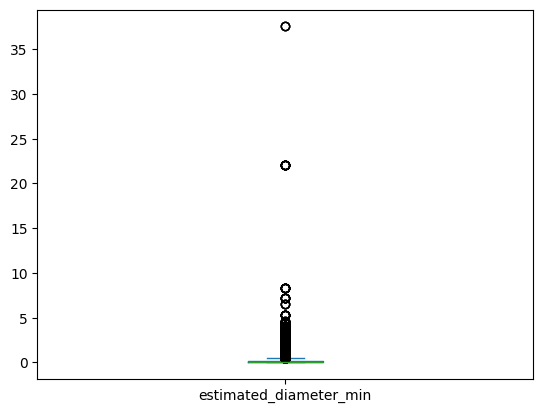

In [53]:
data.estimated_diameter_min.plot.box()

In [54]:
data["is_hazardous"].value_counts()

is_hazardous
False    295037
True      43162
Name: count, dtype: int64

In [56]:
data["absolute_magnitude"]=data["absolute_magnitude"].fillna(data["absolute_magnitude"].mean())
data["estimated_diameter_max"]=data["estimated_diameter_max"].fillna(data["estimated_diameter_max"].mean())
data["estimated_diameter_min"]=data["estimated_diameter_min"].fillna(data["estimated_diameter_min"].mean())

In [57]:
y=data["is_hazardous"]
x=data.drop("is_hazardous",axis=1)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [60]:
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

In [67]:
model=RandomForestClassifier(n_estimators=100,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,class_weight="balanced")
model.fit(x_train_sc,y_train)
p_test=model.predict(x_test_sc)
p_train=model.predict(x_train_sc)

In [68]:
print(classification_report(y_train,p_train))

              precision    recall  f1-score   support

       False       1.00      0.74      0.85    221273
        True       0.36      1.00      0.53     32376

    accuracy                           0.77    253649
   macro avg       0.68      0.87      0.69    253649
weighted avg       0.92      0.77      0.81    253649



In [69]:
print(classification_report(y_test,p_test))


              precision    recall  f1-score   support

       False       0.99      0.74      0.85     73764
        True       0.35      0.97      0.52     10786

    accuracy                           0.77     84550
   macro avg       0.67      0.85      0.68     84550
weighted avg       0.91      0.77      0.80     84550

